In [2]:
# 1ère partie : Bagging
# Import nécessaire pour la partie Bagging
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
# Constructions d'un ensemble de classifieurs. Chauqe classifieur utilise la moitié des points pour son apprentissage et la moitié des attributs
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

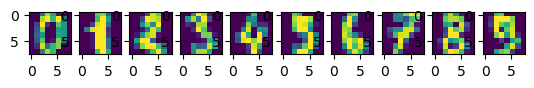

In [4]:
digits = load_digits()

# Affichage des 10 premières images
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [5]:
# On crée un arbre de décision
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [6]:
# Pour plus de réalisme on sépare le jeu de donnée : 90% des données pour le test, 10% pour l'apprentissage

#Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Entraînement du modèle
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prédiction du modèle
Z = clf.predict(X_test)

# Évaluation de la précision
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6631644004944376


In [7]:
# Calcul de la variance de la valeur 'accuracy' sur 100 tirages
precisions = []  # Pour stocker les précisions de chaque tirage

for _ in range(100):
    # Séparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    
    # Création et entraînement du modèle
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # Évaluation de la précision
    accuracy = clf.score(X_test, y_test)
    
    # Ajout de la précision à la liste
    precisions.append(accuracy)

# Calcul de la moyenne et de la variance des précisions
mean_accuracy = np.mean(precisions)
variance_accuracy = np.std(precisions)

print(f"Moyenne des précisions : {mean_accuracy}")
print(f"Variance des précisions : {variance_accuracy}")

Moyenne des précisions : 0.8572222222222221
Variance des précisions : 0.032179089905721284


In [10]:
# Construction d'un Classifieur Bagging sur nos données
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [11]:
# Apprentissage et évaluation de l'ensemble
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print(f'Accuracy : {accuracy}')

Accuracy : 1.0


In [12]:
# Calcul de la variance de la valeur 'accuracy' sur 100 tirages
precisions = []  # Pour stocker les précisions de chaque tirage

for _ in range(100):
    # Séparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    
    # Création et entraînement du modèle
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    
    # Évaluation de la précision
    accuracy = clf.score(X_test, y_test)
    
    # Ajout de la précision à la liste
    precisions.append(accuracy)

# Calcul de la moyenne et de la variance des précisions
mean_accuracy = np.mean(precisions)
variance_accuracy = np.std(precisions)

print(f"Moyenne des précisions : {mean_accuracy}")
print(f"Écart-type des précisions : {variance_accuracy}")

Moyenne des précisions : 0.9719999999999999
Variance des précisions : 0.0161382912492136


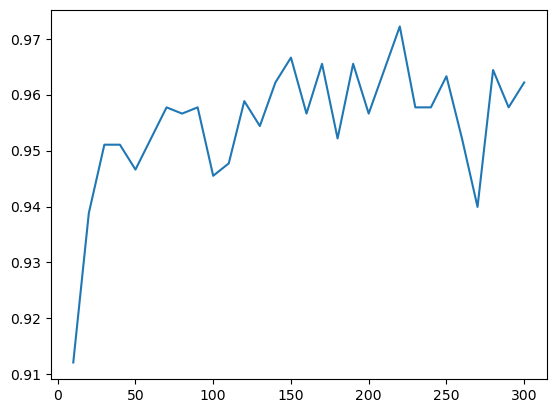

In [13]:
# Construction d'un graphique accuracy vs n_estimators
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [14]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# On cherche les bonnes valeurs pour les paramètres en utilisant la validation croisée avec GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.8809788654060067
max_samples: 0.8
max_features: 0.8


In [15]:
# 2ème partie : Random Forest
# Import supplémentaire
from sklearn.ensemble import RandomForestClassifier

In [16]:
digits = load_digits()
X, y = digits.data, digits.target

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [17]:
# Création du modèle
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [19]:
# Réalisation des prédictions et score du modèle
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(f'Accuracy : {accuracy}')

Accuracy : 0.9134734239802225


In [20]:
# Comparaison entre les arbres de décision simple, Bagging et Random Forest
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6600741656365884
Bagging (200 arbres) : 0.904202719406675
Forêt aléatoire (200 arbres) : 0.915327564894932


In [25]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print('Pour Bagging')
print(f'Moyenne des précisions : {np.mean(bagging_accuracies)},\nÉcart-type des précisions : {np.std(bagging_accuracies)},')


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print('\nPour Random Forest')
print(f'Moyenne des précisions : {np.mean(rf_accuracies)},\nÉcart-type des précisions : {np.std(rf_accuracies)}')

Pour Bagging
Moyenne des précisions : 0.9350389321468299,
Écart-type des précisions : 0.010233592880978864,

Pour Random Forest
Moyenne des précisions : 0.9630700778642936,
Écart-type des précisions : 0.005092557571639416


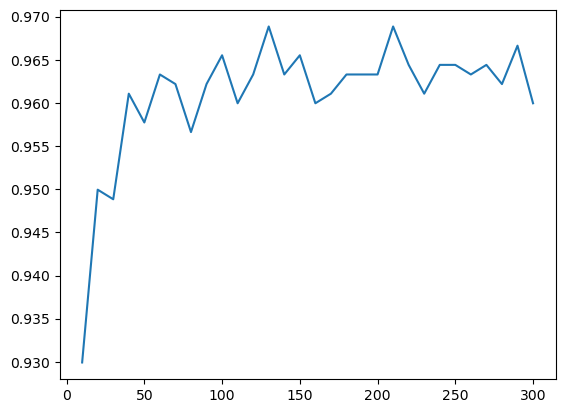

In [27]:
# Construction du graphique accuracy vs n_estimators
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [29]:
# Même exercice mais avec Extra Trees Classifier
# Comparaison entre Random Forest et Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9588431590656284
Extra Trees : 0.9621802002224694


In [49]:
# 3ème partie : Boosting
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=6), n_estimators=200, learning_rate=2, algorithm="SAMME")
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f'Accuracy : {accuracy}')

Accuracy : 0.9239802224969098
